<a href="https://colab.research.google.com/github/sakunisgithub/machine_learning/blob/master/0013_PCA_on_Pizza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
!pip install pca

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.4/190.4 kB 7.2 MB/s eta 0:00:00


In [78]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from matplotlib import pyplot as plt

from pca import pca

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sakunisgithub/data_sets/refs/heads/master/Pizza.csv')

In [3]:
df.shape

(300, 9)

In [10]:
df.columns

Index(['brand', 'id', 'mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   300 non-null    object 
 1   id      300 non-null    int64  
 2   mois    300 non-null    float64
 3   prot    300 non-null    float64
 4   fat     300 non-null    float64
 5   ash     300 non-null    float64
 6   sodium  300 non-null    float64
 7   carb    300 non-null    float64
 8   cal     300 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.2+ KB


In [8]:
df.iloc[:, 2:].describe()

,mois,prot,fat,ash,sodium,carb,cal
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,40.903067,13.373567,20.229533,2.633233,0.669400,22.864767,3.271000
std,9.552987,6.434392,8.975658,1.269724,0.370358,18.029722,0.620034
min,25.000000,6.980000,4.380000,1.170000,0.250000,0.510000,2.180000
25%,30.902500,8.060000,14.770000,1.450000,0.450000,3.467500,2.910000
50%,43.300000,10.440000,17.135000,2.225000,0.490000,23.245000,3.215000
75%,49.115000,20.022500,21.435000,3.592500,0.702500,41.337500,3.520000
max,57.220000,28.480000,47.200000,5.430000,1.790000,48.640000,5.080000


In [7]:
df.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


Standardizing the data

In [23]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df.iloc[:, 2:])

Covariance Matrix

In [26]:
cov_mat = np.cov(df_scaled, rowvar = False) # as rows are observations, not variables

print(np.round(cov_mat, 3))

[[ 1.003  0.361 -0.172  0.266 -0.103 -0.594 -0.767]
 [ 0.361  1.003  0.5    0.827  0.431 -0.856  0.07 ]
 [-0.172  0.5    1.003  0.794  0.936 -0.642  0.767]
 [ 0.266  0.827  0.794  1.003  0.811 -0.902  0.328]
 [-0.103  0.431  0.936  0.811  1.003 -0.622  0.674]
 [-0.594 -0.856 -0.642 -0.902 -0.622  1.003 -0.024]
 [-0.767  0.07   0.767  0.328  0.674 -0.024  1.003]]


In [70]:
pca_obj = PCA(n_components=7)

df_transformed = pca_obj.fit_transform(df_scaled)

[06-09-2025 12:26:28] [pca.pca] [INFO] Column labels are auto-completed.
[06-09-2025 12:26:28] [pca.pca] [INFO] Row labels are auto-completed.
[06-09-2025 12:26:28] [pca.pca] [INFO] The PCA reduction is performed on the 7 columns of the input dataframe.
[06-09-2025 12:26:28] [pca.pca] [INFO] Fit using PCA.
[06-09-2025 12:26:28] [pca.pca] [INFO] Compute loadings and PCs.
[06-09-2025 12:26:28] [pca.pca] [INFO] Compute explained variance.
[06-09-2025 12:26:28] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[7]
[06-09-2025 12:26:29] [pca.pca] [INFO] Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[06-09-2025 12:26:29] [pca.pca] [INFO] Outlier detection using SPE/DmodX with n_std=[3]


In [36]:
print(f"Explained Variance by the Principal Components -> {np.round(pca_obj.explained_variance_, 3)}")

Explained Variance by the Principal Components -> [4.186 2.298 0.416 0.095 0.028 0.    0.   ]


In [38]:
print(f"Proportion of Variance Explained by the Principal Components -> {np.round(pca_obj.explained_variance_ratio_, 3)}")

Proportion of Variance Explained by the Principal Components -> [0.596 0.327 0.059 0.014 0.004 0.    0.   ]


In [40]:
print(f"Cumulative Proportion of Variance Explained by the Principal Components -> {np.round(np.cumsum(pca_obj.explained_variance_ratio_), 3)}")

Cumulative Proportion of Variance Explained by the Principal Components -> [0.596 0.923 0.982 0.996 1.    1.    1.   ]


We keep only first two Principal Components.

Here are the loadings of the first two Principal Components.

In [52]:
print(np.round(pca_obj.components_[0:2, :], 3))

[[ 0.065  0.379  0.447  0.472  0.436 -0.425  0.244]
 [ 0.628  0.27  -0.234  0.111 -0.202 -0.32  -0.567]]


In [46]:
df_transformed = df_transformed[:, 0:2]

In [47]:
df_transformed.shape

(300, 2)

In [50]:
pd.DataFrame(df_transformed).tail()

,0,1
295,-0.535510,0.530843
296,-0.339636,0.243230
297,-0.646433,0.515434
298,-0.865078,0.921790
299,-0.895868,0.767878


For plots, we use the 'pca' function in 'pca' library.

Loadings Plot

In [82]:
pca_result = pca(n_components = 7)

pca_result.fit_transform(df_scaled)

[06-09-2025 12:53:23] [pca.pca] [INFO] Column labels are auto-completed.
[06-09-2025 12:53:23] [pca.pca] [INFO] Row labels are auto-completed.
[06-09-2025 12:53:23] [pca.pca] [INFO] The PCA reduction is performed on the 7 columns of the input dataframe.
[06-09-2025 12:53:23] [pca.pca] [INFO] Fit using PCA.
[06-09-2025 12:53:23] [pca.pca] [INFO] Compute loadings and PCs.
[06-09-2025 12:53:23] [pca.pca] [INFO] Compute explained variance.
[06-09-2025 12:53:23] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[7]
[06-09-2025 12:53:23] [pca.pca] [INFO] Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[06-09-2025 12:53:23] [pca.pca] [INFO] Outlier detection using SPE/DmodX with n_std=[3]


{'loadings':             1         2         3         4         5         6         7
 PC1  0.064709  0.378761  0.446666  0.471890  0.435703 -0.424914  0.244487
 PC2  0.628276  0.269707 -0.234379  0.110990 -0.201662 -0.320312 -0.567458
 PC3 -0.421669  0.746027 -0.199309  0.056273 -0.455169  0.052237  0.113316
 PC4 -0.220722 -0.010593 -0.507042  0.552399  0.446277  0.334339 -0.279263
 PC5 -0.006470 -0.387983  0.173368  0.670886 -0.602614  0.007437  0.078003
 PC6  0.446450 -0.000172 -0.525403  0.058861  0.003131 -0.000509  0.721914
 PC7  0.418569  0.276765  0.377672  0.056021 -0.000524  0.776068  0.012060,
 'PC':           PC1       PC2       PC3       PC4       PC5       PC6       PC7
 0    5.010343 -2.679215 -0.039327  0.144106 -0.284015  0.002339 -0.000960
 1    5.023755 -2.529295 -0.097056  0.353950 -0.215269 -0.002952 -0.001022
 2    4.805439 -2.673700 -0.075475 -0.107798  0.035038 -0.005424 -0.000832
 3    4.469543 -2.285029 -0.120233 -0.054028 -0.174501 -0.005627 -0.000946
 4    

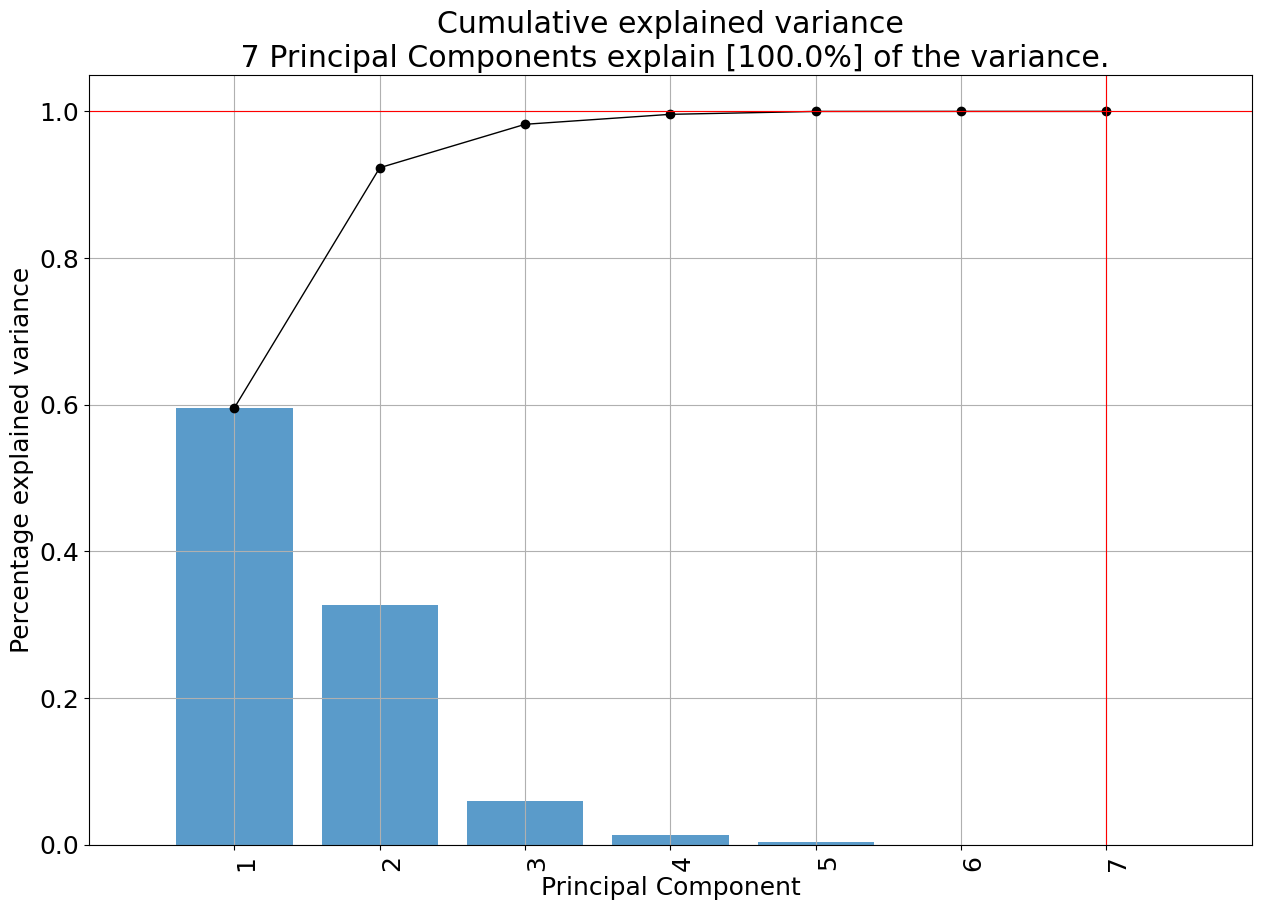

In [83]:
fig, ax = pca_result.plot()

[06-09-2025 12:53:43] [scatterd.scatterd] [INFO] Create scatterplot


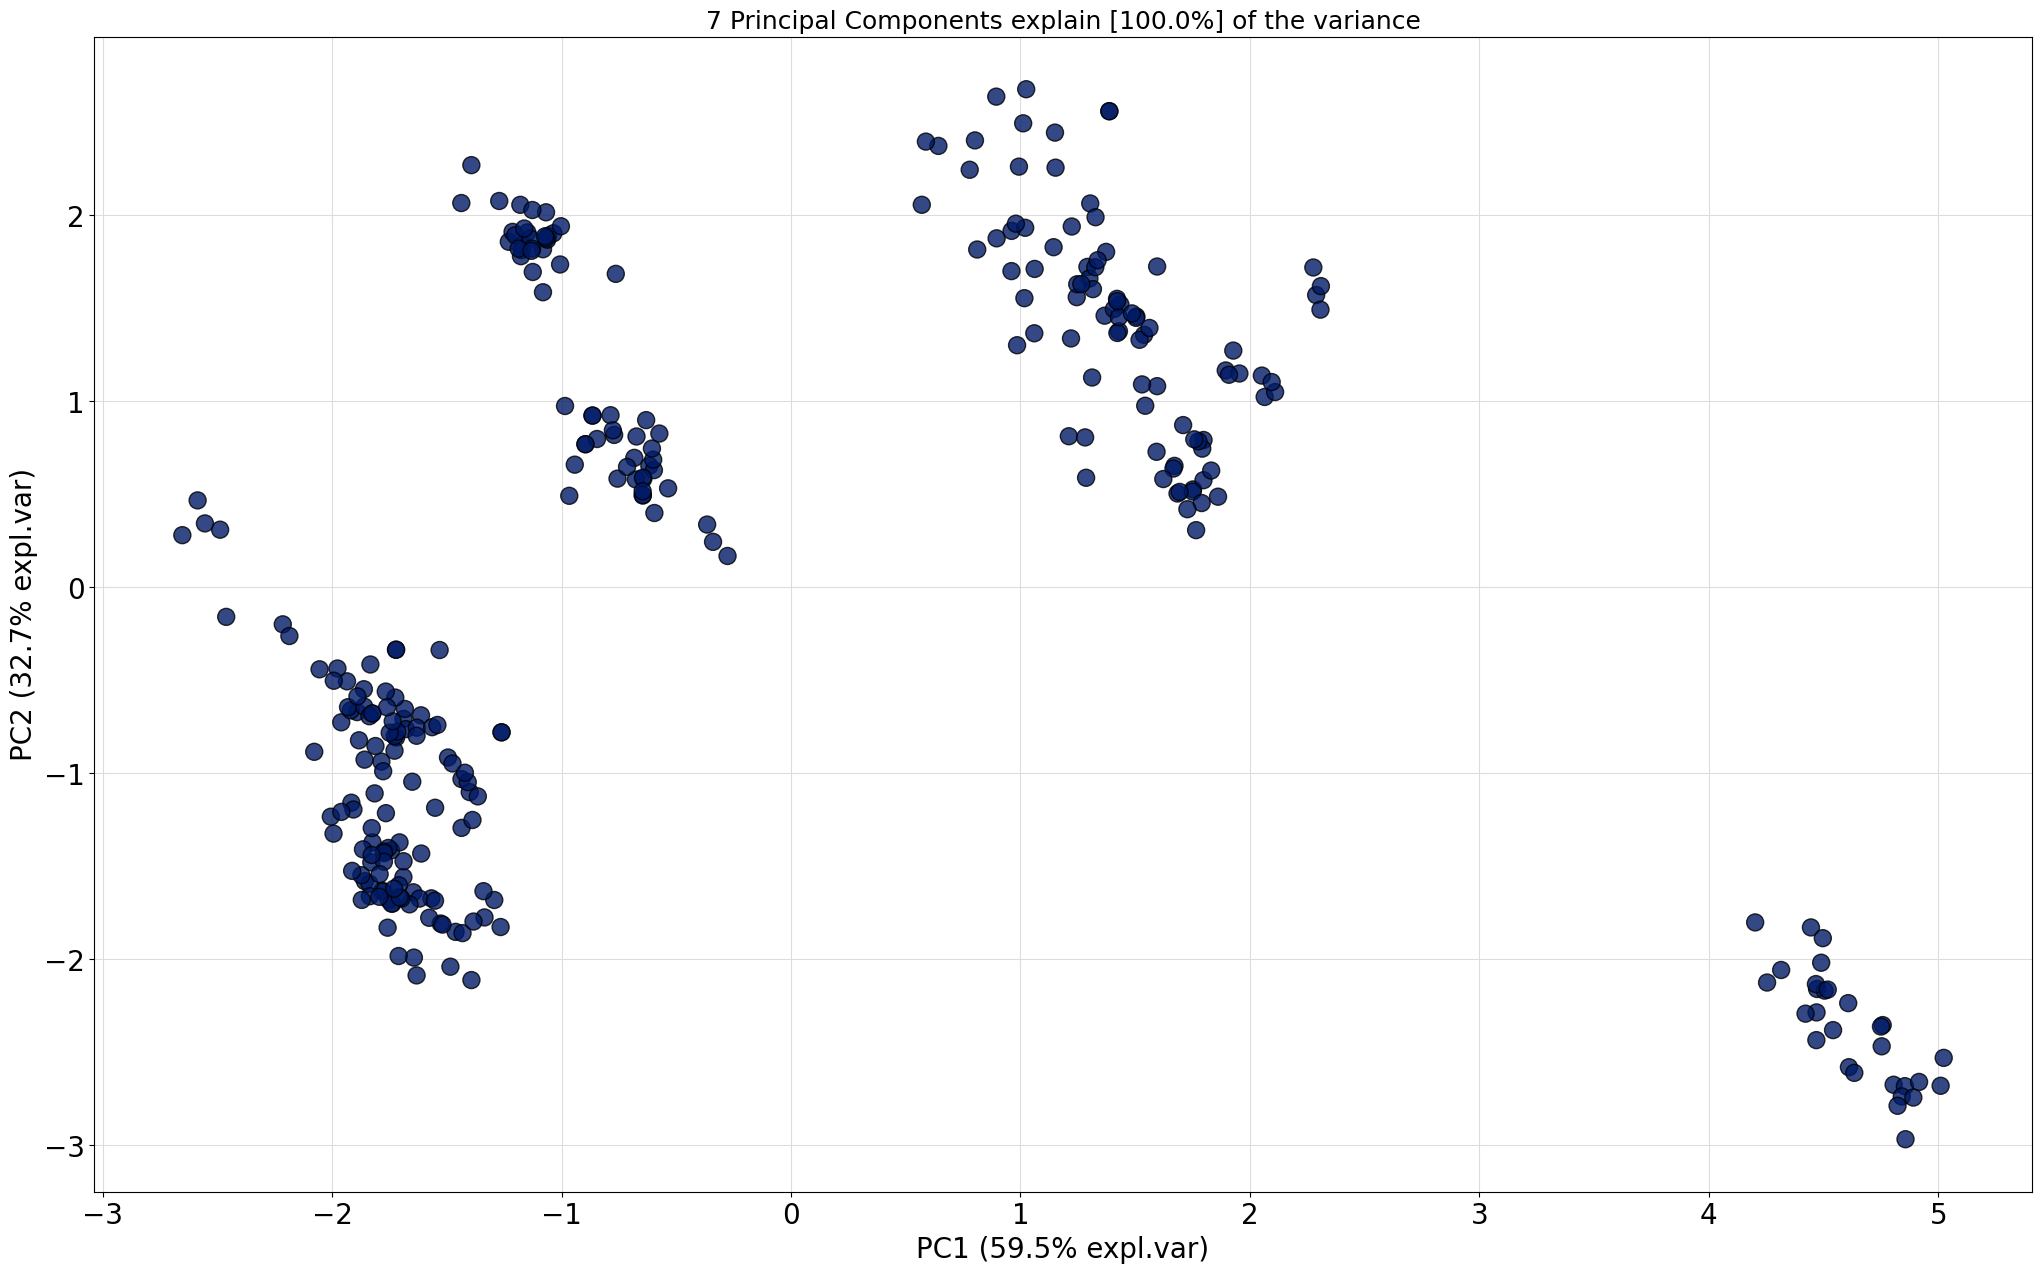

In [84]:
fig, ax = pca_result.scatter()

[06-09-2025 12:53:47] [pca.pca] [INFO] Plot PC1 vs PC2 with loadings.
[06-09-2025 12:53:47] [scatterd.scatterd] [INFO] Create scatterplot


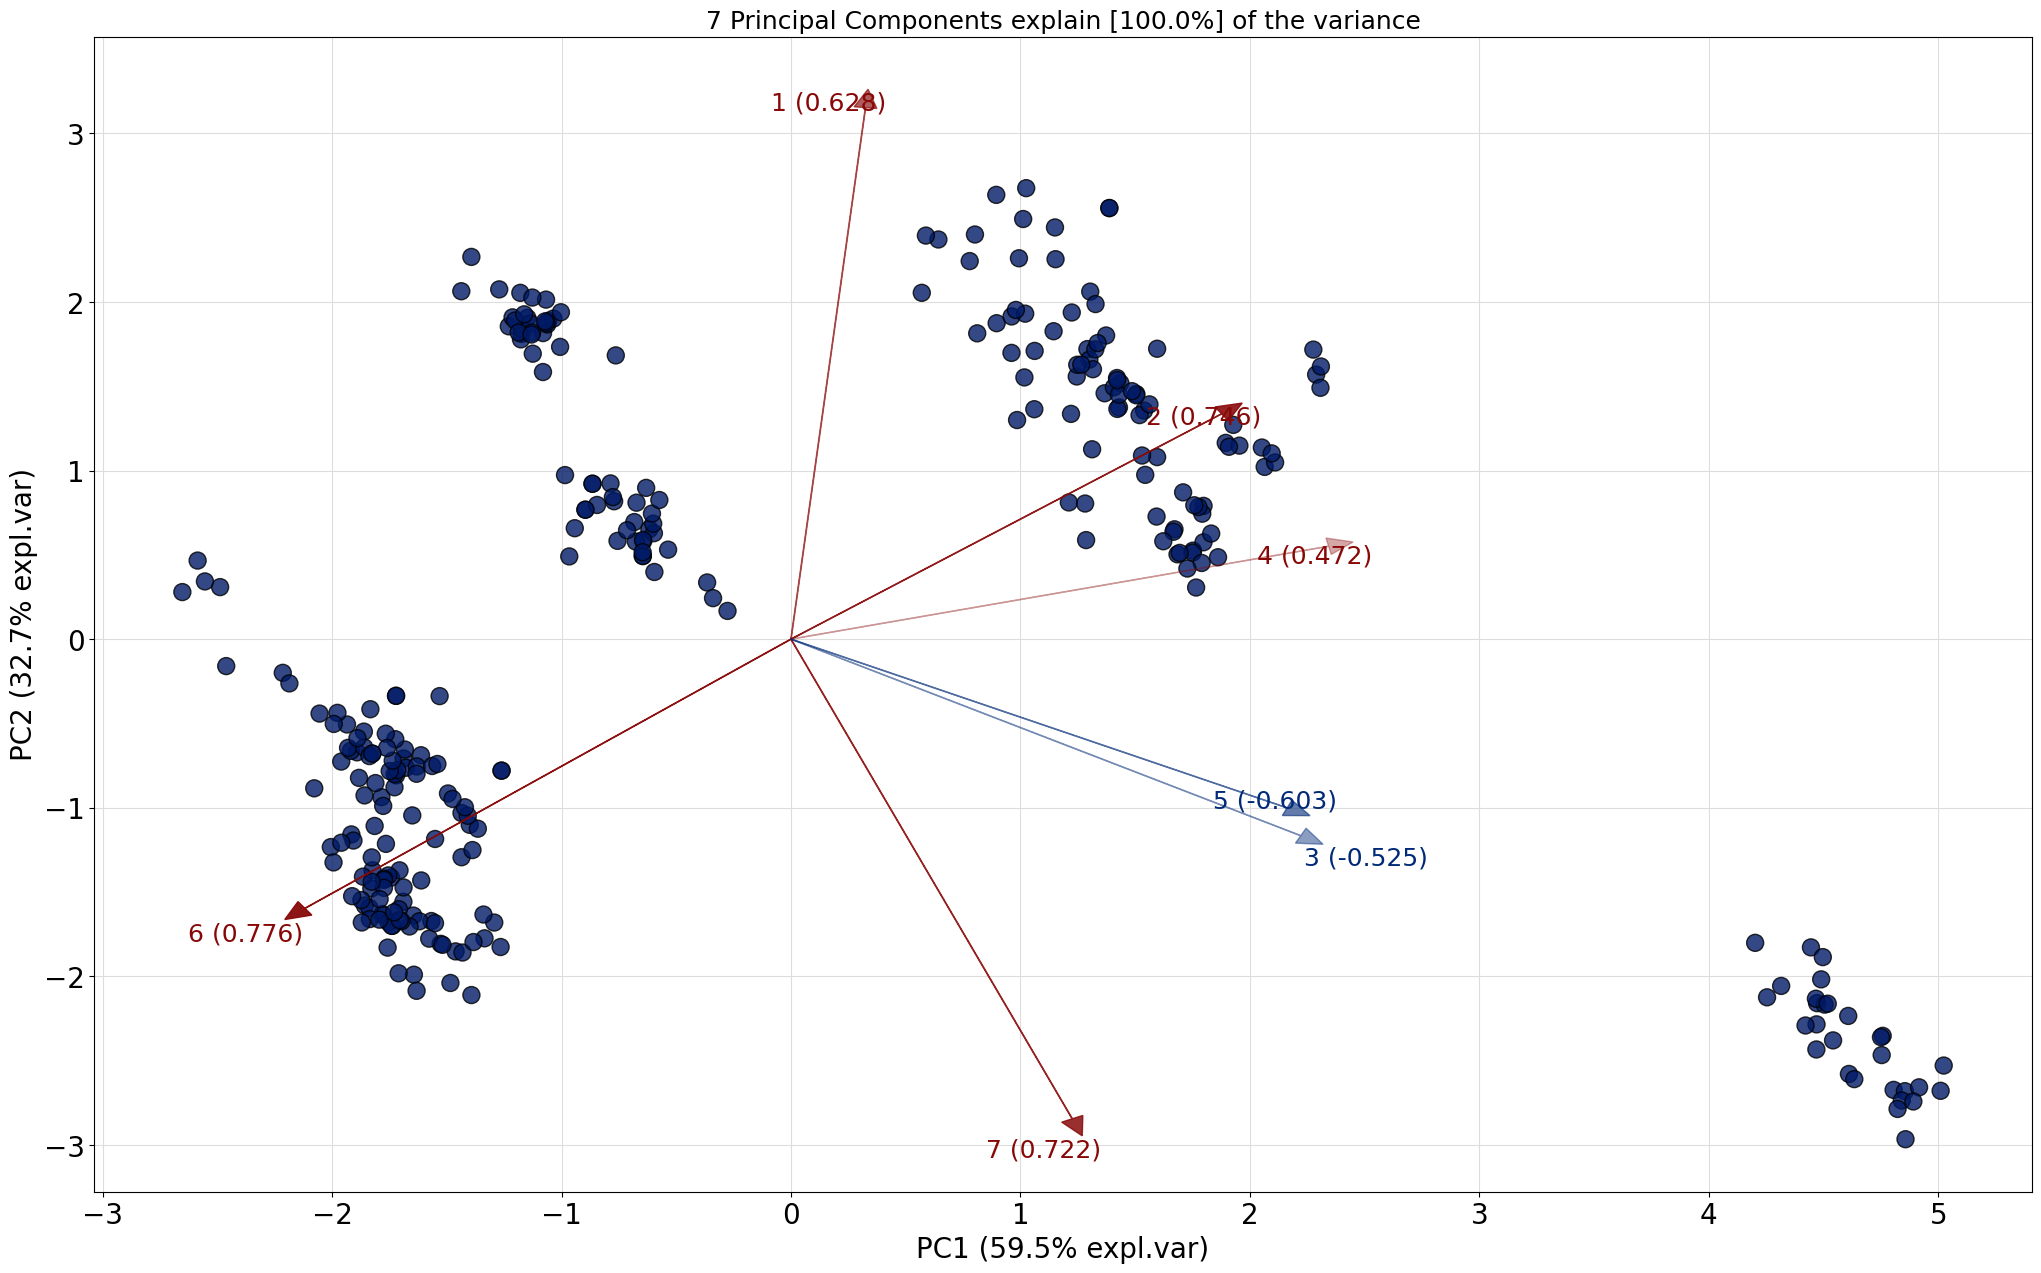

In [85]:
fig, ax = pca_result.biplot(n_feat=7)